In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('Salary_Data_Cleaned.csv') 

In [3]:
df.head()

,Company Name,Competitors,Founded,Headquarters,Industry,Job Description,Job Title,Location,Rating,Revenue,...,Max_Salary,Average_Salary,Company_txt,Same_City,Age,Python,R_Studio,Spark,AWS,Excel
0,Connected\n4.2,-1,2014,"Toronto, Canada",Computer Hardware & Software,Our Software Engineers build products on a var...,Machine Learning Engineer,Toronto,4.2,Unknown / Non-Applicable,...,100,94.5,Connected\n,1,6,1,0,1,0,0
1,Coffee Meets Bagel\n4.4,-1,2012,"San Francisco, CA",Computer Hardware & Software,Coffee Meets Bagel\nCoffee Meets Bagel's missi...,Product Data Scientist,Toronto,4.4,$1 to $5 million (CAD),...,100,94.5,Coffee Meets Bagel\n,0,8,1,0,0,0,0
2,MavTek\n4.6,"MindGeek, Shopify, Lightspeed",2014,"Montreal, Canada",Internet,"Machine Learning Engineer - Intermediate, and ...",Machine Learning Engineer,Montreal,4.6,Unknown / Non-Applicable,...,100,94.5,MavTek\n,1,6,1,0,1,1,0
3,Rubikloud Technologies\n3.7,-1,2013,"Toronto, Canada",Enterprise Software & Network Solutions,"What We Are Building:\n\nAt Rubikloud, we are ...",Data Scientist,Toronto,3.7,Unknown / Non-Applicable,...,100,94.5,Rubikloud Technologies\n,1,7,1,0,1,0,0
4,Suncor Energy Services\n3.9,"Imperial Oil, Husky Energy",1967,"Calgary, Canada",Energy,"LOCATION: Calgary, Alberta (CA-AB)\nJOB NUMBER...",Data Scientist,Calgary,3.9,$10+ billion (CAD),...,100,94.5,Suncor Energy Services\n,1,53,1,0,0,0,1


In [4]:
df.columns

Index(['Company Name', 'Competitors', 'Founded', 'Headquarters', 'Industry',
       'Job Description', 'Job Title', 'Location', 'Rating', 'Revenue',
       'Salary Estimate', 'Sector', 'Size', 'Type of ownership', 'Hourly',
       'Employer_Provided', 'Min_Salary', 'Max_Salary', 'Average_Salary',
       'Company_txt', 'Same_City', 'Age', 'Python', 'R_Studio', 'Spark', 'AWS',
       'Excel'],
      dtype='object')

In [5]:
def title_simplifier(title):
    if 'data scientist'in title.lower():
        return 'data scientist'
    elif 'data engineer' in title.lower():
        return 'data engineer'
    elif 'analyst' in title.lower():
        return 'analyst'
    elif 'machine learning' in title.lower():
        return 'machine learning'
    elif 'manger' in title.lower():
        return 'manager'
    elif 'director' in title.lower():
        return 'director'
    else:
        return 'na'

def seniority(title):
    if 'sr' in title.lower() or 'senior' in title.lower() or 'sr.' in title.lower() or 'lead' in title.lower() or 'principal' in title.lower():
        return 'senior'
    elif 'jr' in title.lower() or 'jr.' in title.lower():
        return 'jr'
    else:
        return 'na'

In [6]:
df['Job Simp'] = df['Job Title'].apply(title_simplifier)

In [7]:
df['Job Seniority'] = df['Job Title'].apply(seniority)

In [8]:
df['Job Seniority'].value_counts()

na        510
senior    188
jr          2
Name: Job Seniority, dtype: int64

In [9]:
df['Seniority'] = df['Job Title'].apply(seniority)

In [10]:
df['Seniority'].value_counts()

na        510
senior    188
jr          2
Name: Seniority, dtype: int64

In [11]:
#Job Description Length
df['Desc Length'] = df['Job Description'].apply(lambda x: len(x))
df['Desc Length']

0      5373
1      3498
2      3120
3      3707
4      7581
       ... 
695    7077
696    4051
697    3138
698    4569
699    4486
Name: Desc Length, Length: 700, dtype: int64

In [12]:
df['Competitors Count'] = df['Competitors'].apply(lambda x: len(x.split()) if x != '-1' else 0)

In [13]:
df['Competitors Count'].value_counts()

0    501
4     73
3     52
5     40
6     14
7      7
2      5
9      3
1      3
8      2
Name: Competitors Count, dtype: int64

In [14]:
df['Company_txt'] = df['Company_txt'].apply(lambda x: x.replace('\n',''))

In [15]:
df.describe()

,Founded,Rating,Hourly,Employer_Provided,Min_Salary,Max_Salary,Average_Salary,Same_City,Age,Python,R_Studio,Spark,AWS,Excel,Desc Length,Competitors Count
count,700.000000,700.000000,700.0,700.0,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000
mean,1359.044286,3.100571,0.0,0.0,63.557143,92.142857,77.850000,0.362857,31.247143,0.575714,0.025714,0.290000,0.218571,0.504286,4078.772857,1.195714
std,916.321501,1.789390,0.0,0.0,24.079408,22.424750,22.429886,0.481168,48.204533,0.494588,0.158395,0.454087,0.413573,0.500339,1985.953894,2.028477
min,-1.000000,-1.000000,0.0,0.0,34.000000,60.000000,49.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,67.000000,0.000000
25%,-1.000000,3.100000,0.0,0.0,42.000000,72.000000,56.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2763.000000,0.000000
50%,1968.000000,3.700000,0.0,0.0,62.000000,92.000000,74.000000,0.000000,14.000000,1.000000,0.000000,0.000000,0.000000,1.000000,3710.500000,0.000000
75%,2004.000000,4.100000,0.0,0.0,80.000000,104.000000,94.500000,1.000000,33.250000,1.000000,0.000000,1.000000,0.000000,1.000000,4984.750000,3.000000
max,2018.000000,5.000000,0.0,0.0,168.000000,198.000000,183.000000,1.000000,226.000000,1.000000,1.000000,1.000000,1.000000,1.000000,14539.000000,9.000000


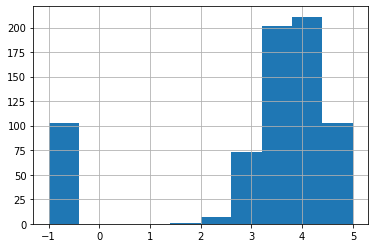

In [16]:
df['Rating'].hist()

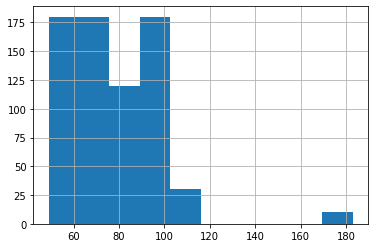

In [17]:
df['Average_Salary'].hist();

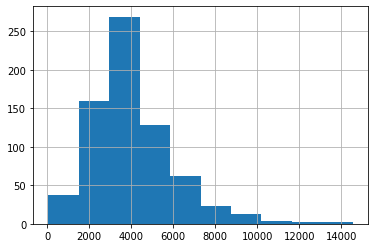

In [18]:
df['Desc Length'].hist();

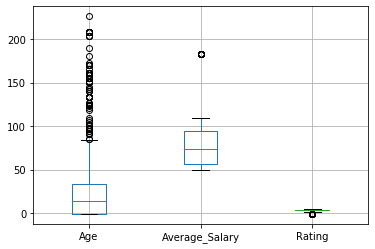

In [19]:
df.boxplot(column = ['Age','Average_Salary','Rating'])

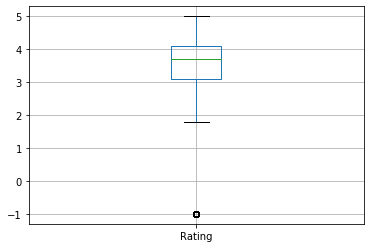

In [20]:
df.boxplot(column = ['Rating'])

In [21]:
correlation = df[['Age','Average_Salary','Rating','Desc Length','Competitors Count']].corr()

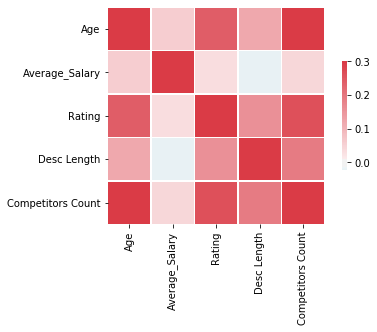

In [22]:
cmap = sns.diverging_palette(220, 10, as_cmap = True)
sns.heatmap(correlation, cmap = cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [23]:
df.columns

Index(['Company Name', 'Competitors', 'Founded', 'Headquarters', 'Industry',
       'Job Description', 'Job Title', 'Location', 'Rating', 'Revenue',
       'Salary Estimate', 'Sector', 'Size', 'Type of ownership', 'Hourly',
       'Employer_Provided', 'Min_Salary', 'Max_Salary', 'Average_Salary',
       'Company_txt', 'Same_City', 'Age', 'Python', 'R_Studio', 'Spark', 'AWS',
       'Excel', 'Job Simp', 'Job Seniority', 'Seniority', 'Desc Length',
       'Competitors Count'],
      dtype='object')

In [24]:
df_cat = df[['Location','Headquarters','Size','Industry','Sector','Revenue','Company_txt','Same_City','Python', 'R_Studio', 'Spark', 'AWS',
       'Excel', 'Job Seniority', 'Seniority']]

Graph for Location: Total = 63


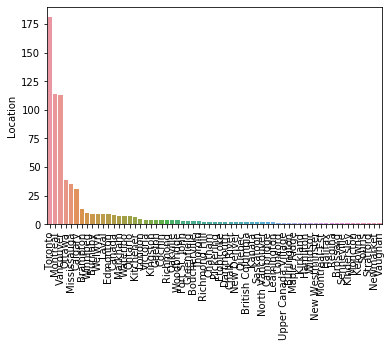

Graph for Headquarters: Total = 142


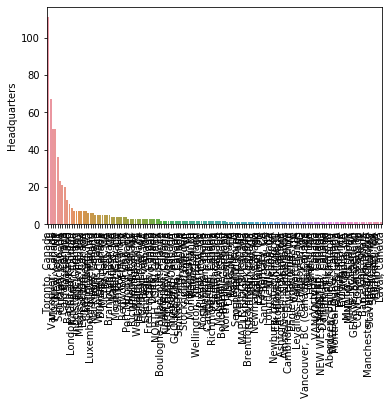

Graph for Size: Total = 9


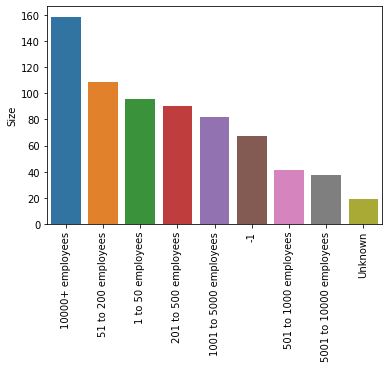

Graph for Industry: Total = 66


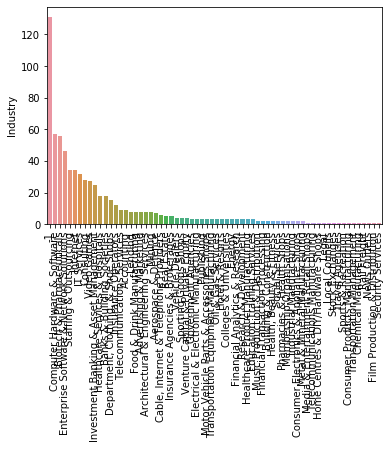

Graph for Sector: Total = 24


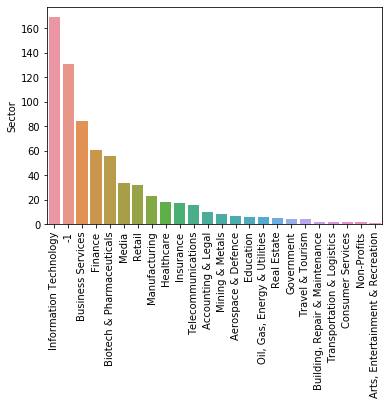

Graph for Revenue: Total = 13


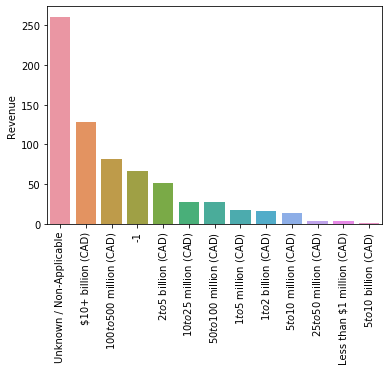

Graph for Company_txt: Total = 419


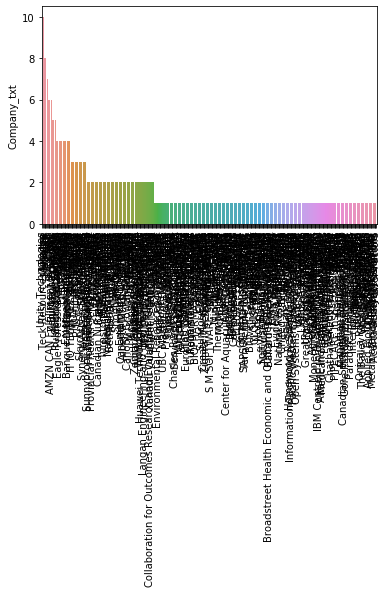

Graph for Same_City: Total = 2


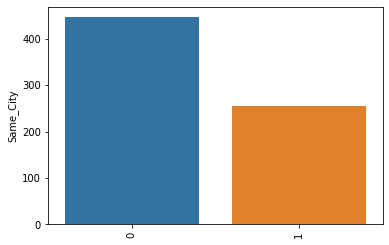

Graph for Python: Total = 2


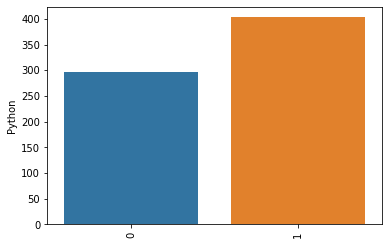

Graph for R_Studio: Total = 2


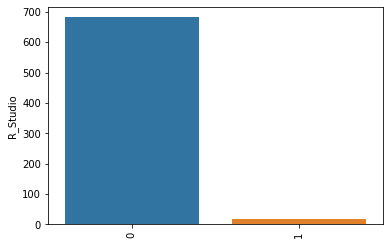

Graph for Spark: Total = 2


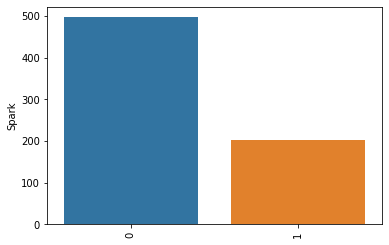

Graph for AWS: Total = 2


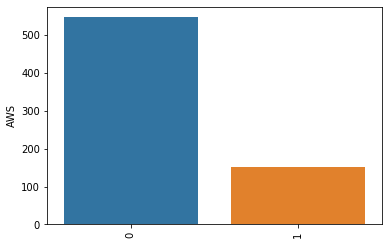

Graph for Excel: Total = 2


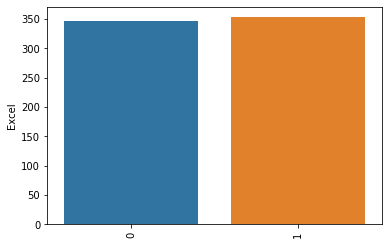

Graph for Job Seniority: Total = 3


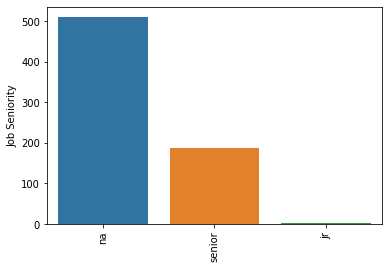

Graph for Seniority: Total = 3


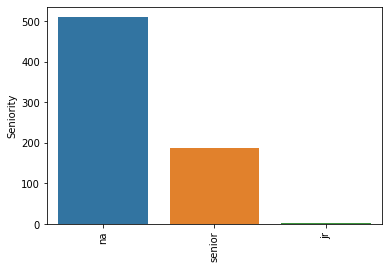

In [25]:
for i in df_cat.columns:
    cat_num = df_cat[i].value_counts()
    print('Graph for %s: Total = %d' %(i, len(cat_num)))
    chart = sns.barplot(x = cat_num.index, y = cat_num)
    chart.set_xticklabels(chart.get_xticklabels(), rotation = 90)
    plt.show()

Graph for Location: Total = 20


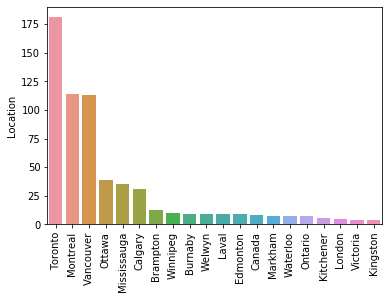

Graph for Headquarters: Total = 20


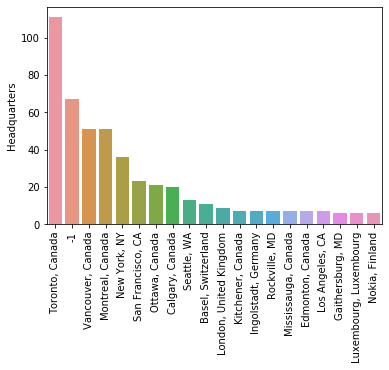

Graph for Company_txt: Total = 20


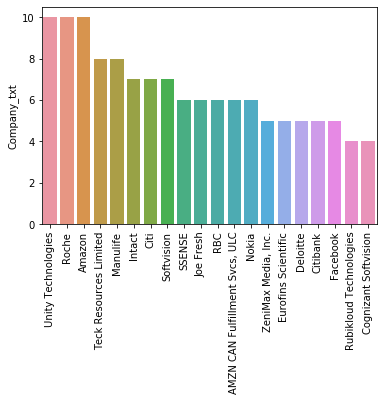

In [26]:
for i in df_cat[['Location','Headquarters','Company_txt']].columns:
    cat_num = df_cat[i].value_counts()[:20]
    print('Graph for %s: Total = %d' %(i, len(cat_num)))
    chart = sns.barplot(x = cat_num.index, y = cat_num)
    chart.set_xticklabels(chart.get_xticklabels(), rotation = 90)
    plt.show()

In [27]:
df.columns

Index(['Company Name', 'Competitors', 'Founded', 'Headquarters', 'Industry',
       'Job Description', 'Job Title', 'Location', 'Rating', 'Revenue',
       'Salary Estimate', 'Sector', 'Size', 'Type of ownership', 'Hourly',
       'Employer_Provided', 'Min_Salary', 'Max_Salary', 'Average_Salary',
       'Company_txt', 'Same_City', 'Age', 'Python', 'R_Studio', 'Spark', 'AWS',
       'Excel', 'Job Simp', 'Job Seniority', 'Seniority', 'Desc Length',
       'Competitors Count'],
      dtype='object')

In [28]:
pd.pivot_table(df, index = 'Job Simp', values = 'Average_Salary')

,Average_Salary
Job Simp,
analyst,78.651786
data engineer,73.506757
data scientist,86.421429
director,69.500000
machine learning,77.140625
na,74.870732


In [29]:
pd.pivot_table(df, index = ['Seniority','Job Simp'], values = 'Average_Salary')

Average_Salary
Seniority Job Simp                        
jr        data scientist        109.500000
          na                     81.500000
na        analyst                79.598485
          data engineer          74.283654
          data scientist         91.608434
          director               72.333333
          machine learning       73.706897
          na                     77.192308
senior    analyst                75.180556
          data engineer          71.670455
          data scientist         78.321429
          director               52.500000
          machine learning      110.333333
          na                     67.187500

In [46]:
pd.set_option('display.max_rows',None)

In [56]:
pd.pivot_table(df[df['Job Simp'] == 'data scientist'], index = 'Location', values = 'Average_Salary').sort_values('Average_Salary',ascending = False)

,Average_Salary
Location,
Burnaby,109.500000
Edmonton,109.500000
Quebec,102.500000
Windsor,102.500000
Mississauga,102.166667
Canada,102.000000
Pickering,95.250000
Thorold,94.500000
Ontario,94.500000


In [ ]:
#rating, revenue, number of competitors, python, r, spark, aws, excel, desc length